<a href="https://colab.research.google.com/github/xzjiu/MIA_Skin_Classification/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: mount mydrive to the current workspace

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/skin_lesion_dataset'

In [ ]:
# prompt: get name of a folder

import os

folder_name = os.path.basename(data_path)

print(folder_name)


skin_lesion_dataset


Total number of images: 150


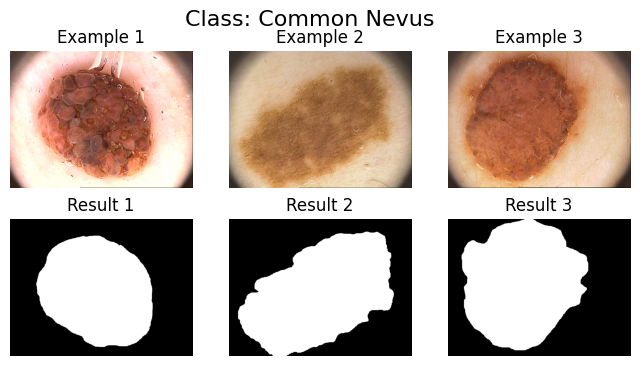

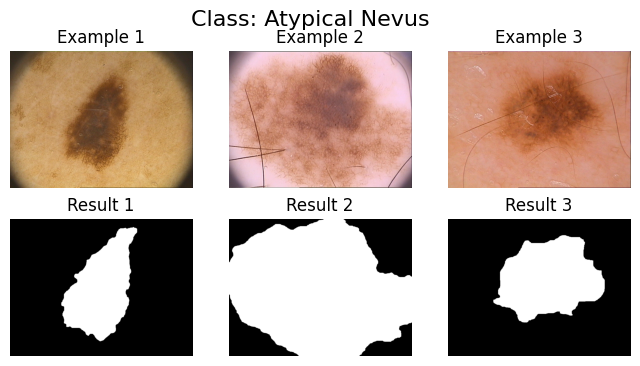

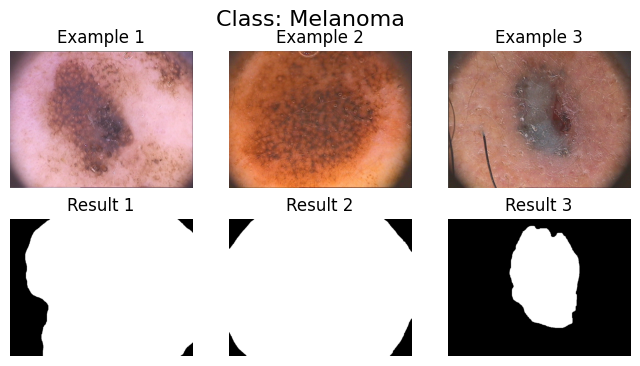

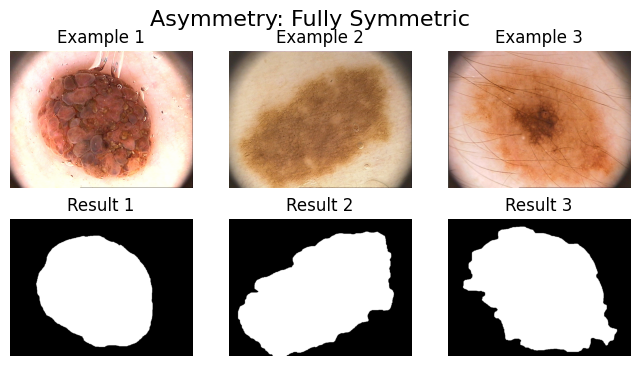

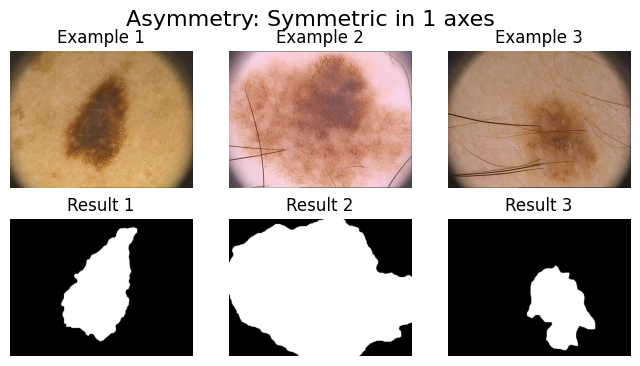

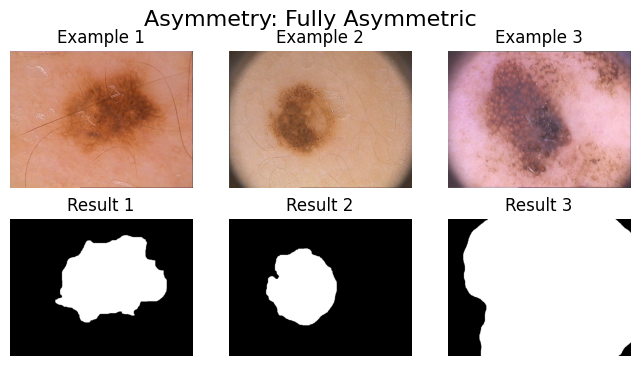

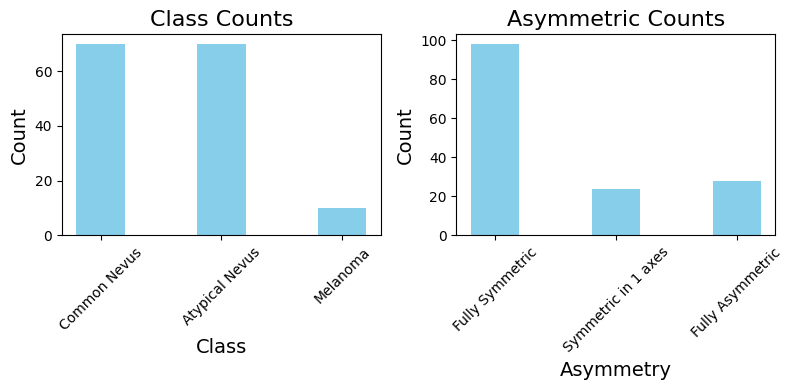

In [ ]:
import os
import json
from PIL import Image
import matplotlib.pyplot as plt

# Function to read JSON file
def read_json(json_path):
    with open(json_path, 'r') as file:
        data = json.load(file)
    return data

# Function to load images
def load_images(original_path, result_path):
    original_image = Image.open(original_path)
    result_image = Image.open(result_path)
    return original_image, result_image

# Main function to process the dataset
def process_dataset(dataset_path):
    class_counts = {}
    asymmetric_counts = {}

    class_examples = {}
    asymmetric_examples = {}

    numnber_of_images = 0

    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)
        if os.path.isdir(folder_path):
            label_path = os.path.join(folder_path, folder_name + '_label.json')
            original_image_path = os.path.join(folder_path, folder_name +'_Dermoscopic_Image', folder_name+'.bmp')
            result_image_path = os.path.join(folder_path, folder_name +'_lesion', folder_name+'_lesion.bmp')

            # Read JSON file
            label_data = read_json(label_path)
            class_info = label_data.get('Lesion Class')
            asymmetric_info = label_data.get('Asymmetry Label')

            # Update counts
            class_counts[class_info] = class_counts.get(class_info, 0) + 1
            asymmetric_counts[asymmetric_info] = asymmetric_counts.get(asymmetric_info, 0) + 1

            # Store examples
            if class_info not in class_examples:
                class_examples[class_info] = []
            if asymmetric_info not in asymmetric_examples:
                asymmetric_examples[asymmetric_info] = []

            if len(class_examples[class_info]) < 3:
                original_image, result_image = load_images(original_image_path, result_image_path)
                class_examples[class_info].append((original_image, result_image))

            if len(asymmetric_examples[asymmetric_info]) < 3:
                original_image, result_image = load_images(original_image_path, result_image_path)
                asymmetric_examples[asymmetric_info].append((original_image, result_image))

            numnber_of_images += 1

    print(f"Total number of images: {numnber_of_images}")

    # Plot examples for each class
    for class_info, examples in class_examples.items():
        plt.figure(figsize=(8, 4))
        plt.suptitle(f"Class: {class_info}", fontsize=16)
        for i, (original_image, result_image) in enumerate(examples):
            plt.subplot(2, 3, i + 1)
            plt.imshow(original_image)
            plt.title(f'Example {i + 1}')
            plt.axis('off')
            plt.subplot(2, 3, i + 4)
            plt.imshow(result_image)
            plt.title(f'Result {i + 1}')
            plt.axis('off')
        plt.show()

    # Plot examples for each asymmetry
    for asymmetric_info, examples in asymmetric_examples.items():
        plt.figure(figsize=(8, 4))
        plt.suptitle(f"Asymmetry: {asymmetric_info}", fontsize=16)
        for i, (original_image, result_image) in enumerate(examples):
            plt.subplot(2, 3, i + 1)
            plt.imshow(original_image)
            plt.title(f'Example {i + 1}')
            plt.axis('off')
            plt.subplot(2, 3, i + 4)
            plt.imshow(result_image)
            plt.title(f'Result {i + 1}')
            plt.axis('off')
        plt.show()

    # Plot statistics
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue', width=0.4)
    plt.title('Class Counts', fontsize=16)
    plt.xlabel('Class', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.bar(asymmetric_counts.keys(), asymmetric_counts.values(), color='skyblue', width=0.4)
    plt.title('Asymmetric Counts', fontsize=16)
    plt.xlabel('Asymmetry', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()


    plt.show()

# Example usage
process_dataset(data_path)


In [ ]:
# prompt: count the dataset size

total_images = 0
for folder_name in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder_name)
    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.bmp'):
                total_images += 1

print(f"Total images in dataset: {total_images}")


Total images in dataset: 0
